# Question 1

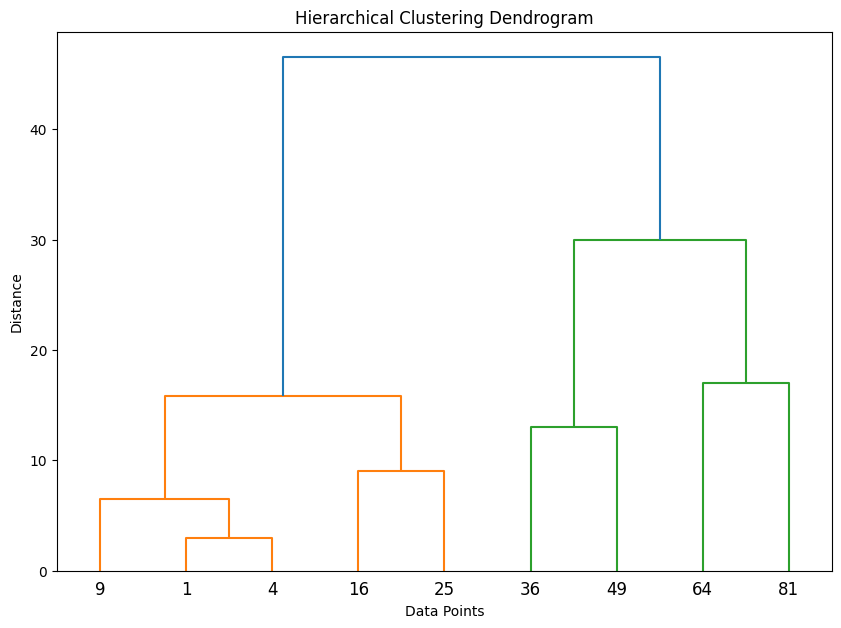

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

data_points = np.array([[1], [4], [9], [16], [25], [36], [49], [64], [81]])

Z = linkage(data_points, method='centroid')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=[str(x[0]) for x in data_points])
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


# Question 2

In [8]:
from scipy.spatial.distance import euclidean

points = np.array([
    [4, 10], [7, 10], [9, 3], [11, 4], [12, 6], [2, 2], [5, 2], [3, 4], [4, 8], [6, 8], [10, 5], [12, 3]
])

first_point = np.array([3, 4])

def find_farthest_point(points, reference_point):
    max_distance = 0
    farthest_point = None
    for point in points:
        distance = euclidean(point, reference_point)
        if distance > max_distance:
            max_distance = distance
            farthest_point = point
    return farthest_point

second_point = find_farthest_point(points, first_point)

third_point = None
max_distance_to_closest = 0
for point in points:
    distance_to_first = euclidean(point, first_point)
    distance_to_second = euclidean(point, second_point)
    distance_to_closest = min(distance_to_first, distance_to_second)
    
    if distance_to_closest > max_distance_to_closest:
        max_distance_to_closest = distance_to_closest
        third_point = point

first_point, second_point, third_point



(array([3, 4]), array([12,  6]), array([ 7, 10]))

# Question 3

In [12]:
from scipy.spatial.distance import mahalanobis

std_devs = [2, 3, 5]

inverse_covariance_matrix = np.diag([1/(std_dev**2) for std_dev in std_devs])

origin = [0, 0, 0]
point = [1, -3, 4]

mahalanobis_distance = mahalanobis(origin, point, inverse_covariance_matrix)
mahalanobis_distance



1.374772708486752

# Question 4


a) Classifying the Rest of the Points in the Initial Load
With clusters initially centered at Point 1 (1.5, 2.5), Point 3 (8, 10), and Point 5 (5.5, 4.5), we classify the other points as follows:

Point 2 (2.5, 1.5) would likely be classified into the cluster with Point 1, as it is closer to this point.
Point 4 (9, 8) would likely be classified into the cluster with Point 3, as it is closer to this point. 

b) Evolution of Clusters with Next Points

Point 6 (1, 1) would be classified into the cluster with Point 1.
Point 7 (9, 9) would be classified into the cluster with Point 3.
Point 8 (6, 5) would be classified into the cluster with Point 5.
After these classifications, the BFR algorithm would update the cluster centers based on the newly assigned points.

c) Sketching the Clusters and Summarizing Statistics
After processing points 1-8, the clusters would include the following points:

Cluster 1 (Centered at Point 1): Points 1, 2, 6
Cluster 2 (Centered at Point 3): Points 3, 4, 7
Cluster 3 (Centered at Point 5): Points 5, 8

Please see the next cell for the code:


d) Classification of Points A, B, C by the BFR Algorithm
After processing 60% of the data:

Point A (10, 10) would likely be classified into Cluster 2, which is centered around (8, 8).
Point B (2, 3) would likely be classified into Cluster 1, which is centered around (2, 2).
Point C (5, 6) could be classified into either Cluster 3 or possibly Cluster 1 or 2, depending on the updated cluster centers after processing 60% of the data. 


e) Final Clusters After Processing All Data Points
The final clusters are expected to form around the original centers provided by the dataset: (2,2), (8,8), and (5,5). Given the normal distribution of the data points around these centers with specified standard deviations, the clusters should approximate normal distributions centered at these points.

Cluster 1: Centered around (2,2), incorporating points closer to this center.
Cluster 2: Centered around (8,8), incorporating points closer to this center.
Cluster 3: Centered around (5,5), incorporating points closer to this center.
The clusters should be roughly circular, with the spread determined by the respective standard deviations: 1 for the cluster around (2,2), 2 for the cluster around (8,8), and 1.5 for the cluster around (5,5). Over time, as more points are processed, the BFR algorithm will refine these clusters, and their centers may shift slightly based on the actual data points.






In [13]:
cluster_centers = {
    'Cluster 1': np.array([1.5, 2.5]),
    'Cluster 2': np.array([8, 10]),
    'Cluster 3': np.array([5.5, 4.5])
}

points = {
    'Point 2': np.array([2.5, 1.5]),
    'Point 4': np.array([9, 8]),
    'Point 6': np.array([1, 1]),
    'Point 7': np.array([9, 9]),
    'Point 8': np.array([6, 5])
}

def classify_points_to_clusters(points, cluster_centers):
    clusters = {'Cluster 1': [], 'Cluster 2': [], 'Cluster 3': []}

    for point_name, point in points.items():
        nearest_cluster = min(cluster_centers, key=lambda k: np.linalg.norm(point - cluster_centers[k]))
        clusters[nearest_cluster].append(point_name)

    return clusters

clusters = classify_points_to_clusters(points, cluster_centers)

clusters['Cluster 1'].append('Point 1')
clusters['Cluster 2'].append('Point 3')
clusters['Cluster 3'].append('Point 5')

def calculate_cluster_statistics(clusters, points):
    stats = {}

    for cluster, point_names in clusters.items():
        n = len(point_names)
        sum_points = np.sum([points[pn] for pn in point_names if pn in points], axis=0)
        sumsqr_points = np.sum([np.square(points[pn]) for pn in point_names if pn in points], axis=0)

        stats[cluster] = {
            'N': n,
            'SUM': sum_points,
            'SUMSQ': sumsqr_points
        }
        
    return stats

cluster_stats = calculate_cluster_statistics(clusters, points)

clusters, cluster_stats



({'Cluster 1': ['Point 2', 'Point 6', 'Point 1'],
  'Cluster 2': ['Point 4', 'Point 7', 'Point 3'],
  'Cluster 3': ['Point 8', 'Point 5']},
 {'Cluster 1': {'N': 3,
   'SUM': array([3.5, 2.5]),
   'SUMSQ': array([7.25, 3.25])},
  'Cluster 2': {'N': 3, 'SUM': array([18, 17]), 'SUMSQ': array([162, 145])},
  'Cluster 3': {'N': 2, 'SUM': array([6, 5]), 'SUMSQ': array([36, 25])}})

# Question 5

Break-Even Point: The break-even point between renting and buying is 10 days ($10 to buy vs. $1/day for renting).





# Question 6

a) Ad Allocation for Given Search Queries Using GBA
The Generalized Balance Algorithm (GBA) assigns ads based on the largest unspent budget of interested advertisers. Let's allocate ads for the queries:

Query 1 (Relevant to A and B): Company C has the largest budget ($130), but is not interested. Between A and B, B has the larger budget ($120). Assign to B. Budget left: A=$100, B=$119, C=$130. \
Query 2 (Relevant to B and C): C has the largest budget ($130). Assign to C. Budget left: A=$100, B=$119, C=$129. \
Query 3 (Relevant to A and C): C still has the largest budget ($129). Assign to C. Budget left: A=$100, B=$119, C=$128. \
Query 4 (Relevant to B): Only B is interested. Assign to B. Budget left: A=$100, B=$118, C=$128. \
Query 5 (Relevant to C): Only C is interested. Assign to C. Budget left: A=$100, B=$118, C=$127. \

b) Remaining Budget for Each Advertiser 
Company A: $100 \
Company B: $118 \
Company C: $127 

c) Different Order of Search Queries
The order of search queries can indeed affect the ad allocation. Let's consider a different order:

Query 3 (A and C) \
Query 1 (A and B) \
Query 2 (B and C) \
Query 4 (B) \
Query 5 (C) \ 
Allocations in this order: 

Query 3 to C, Query 1 to A, Query 2 to C, Query 4 to B, Query 5 to C. \
Resulting budgets: A = $99, B = $118, C = $126. \
This order changes the allocation and the remaining budgets, highlighting the impact of query order on ad allocation in GBA.

d) Allocation and Budgets with $2 per Click
If each click costs $2:

Query 1: Assign to B. Budgets: A=$100, B=$118, C=$130. \
Querry 2: Assign to C. Budgets: A=$100, B=$118, C=$128. \
Query 3: Assign to C. Budgets: A=$100, B=$118, C=$126. \
Query 4: Assign to B. Budgets: A=$100, B=$116, C=$126. \
Query 5: Assign to C. Budgets: A=$100, B=$116, C=$124. \
e) Potential Limitations or Drawbacks
Larger budgets may dominate ad placements, reducing exposure for smaller-budget companies. High-budget advertisers might rapidly consume their budget on less relevant queries. The algorithm doesn't consider the return on investment for advertisers, which might not be optimal for their specific goals.

# Question 7 

In [16]:
C1 = np.array([3.06, 500, 6])
C2 = np.array([2.68, 320, 4])
C3 = np.array([2.92, 640, 6])

def angle_between_vectors(v1, v2, alpha, beta):
    v1_scaled = np.array([v1[0], v1[1] * alpha, v1[2] * beta])
    v2_scaled = np.array([v2[0], v2[1] * alpha, v2[2] * beta])
    
    dot_product = np.dot(v1_scaled, v2_scaled)
    magnitude_v1 = np.linalg.norm(v1_scaled)
    magnitude_v2 = np.linalg.norm(v2_scaled)
    
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
    
    theta = np.arccos(cos_theta) * (180 / np.pi)
    return theta

angles_alpha_beta_1 = {
    "C1-C2": angle_between_vectors(C1, C2, 1, 1),
    "C1-C3": angle_between_vectors(C1, C3, 1, 1),
    "C2-C3": angle_between_vectors(C2, C3, 1, 1)
}

angles_alpha_beta_2 = {
    "C1-C2": angle_between_vectors(C1, C2, 0.01, 0.5),
    "C1-C3": angle_between_vectors(C1, C3, 0.01, 0.5),
    "C2-C3": angle_between_vectors(C2, C3, 0.01, 0.5)
}

avg_processor_speed = np.mean([3.06, 2.68, 2.92])
avg_disk_size = np.mean([500, 320, 640])
avg_main_memory = np.mean([6, 4, 6])

alpha_inverse = 1 / avg_disk_size
beta_inverse = 1 / avg_main_memory

angles_inverse = {
    "C1-C2": angle_between_vectors(C1, C2, alpha_inverse, beta_inverse),
    "C1-C3": angle_between_vectors(C1, C3, alpha_inverse, beta_inverse),
    "C2-C3": angle_between_vectors(C2, C3, alpha_inverse, beta_inverse)
}

angles_alpha_beta_1, angles_alpha_beta_2, angles_inverse



({'C1-C2': 0.13232019670460035,
  'C1-C3': 0.1748578990699256,
  'C2-C3': 0.28240076879579834},
 {'C1-C2': 7.7433676747857705,
  'C1-C3': 7.451623812439634,
  'C2-C3': 14.262328442796376},
 {'C1-C2': 6.071648921036559,
  'C1-C3': 5.368226522288894,
  'C2-C3': 10.812325507058954})

# Question 8

In [17]:
from sklearn.metrics.pairwise import cosine_similarity


ratings_nan_corrected = np.array([
    [4, np.nan, 3, 5, 1],
    [5, 1, np.nan, 2, 4],
    [3, 5, 2, np.nan, 3],
    [4, 2, 3, 4, np.nan],
    [np.nan, 4, 5, 1, 3]
])

def predict_user_based_corrected(ratings, target_user, target_movie):
    similarities = []
    weighted_sum = 0
    sum_of_similarities = 0

    for other_user, other_ratings in enumerate(ratings):
        if other_user != target_user:
            common_movies = ~np.isnan(ratings[target_user]) & ~np.isnan(other_ratings)
            if np.any(common_movies):
                similarity = cosine_similarity([ratings[target_user][common_movies]], [other_ratings[common_movies]])[0][0]
                similarities.append((similarity, other_ratings[target_movie]))
    
    for similarity, rating in similarities:
        if not np.isnan(rating):
            weighted_sum += similarity * rating
            sum_of_similarities += similarity
    
    return weighted_sum / sum_of_similarities if sum_of_similarities else None

def predict_item_based_corrected(ratings, target_user, target_movie):
    similarities = []
    weighted_sum = 0
    sum_of_similarities = 0

    for other_movie in range(ratings.shape[1]):
        if other_movie != target_movie:
            # Only consider users who have rated both movies
            common_users = ~np.isnan(ratings[:, target_movie]) & ~np.isnan(ratings[:, other_movie])
            if np.any(common_users):
                similarity = cosine_similarity([ratings[:, target_movie][common_users]], [ratings[:, other_movie][common_users]])[0][0]
                similarities.append((similarity, ratings[target_user, other_movie]))
    
    for similarity, rating in similarities:
        if not np.isnan(rating):
            weighted_sum += similarity * rating
            sum_of_similarities += similarity
    
    return weighted_sum / sum_of_similarities if sum_of_similarities else None

user_based_prediction_corrected = predict_user_based_corrected(ratings_nan_corrected, 0, 1)  # User A's rating for Movie 2 (User-Based)
item_based_prediction_corrected = predict_item_based_corrected(ratings_nan_corrected, 0, 1)  # User A's rating for Movie 2 (Item-Based)

user_based_prediction_corrected, item_based_prediction_corrected



(2.9562746964232876, 3.1349101013256924)

# Question 9


a) Greedy Algorithm on Query Sequence xxyyzz \
The greedy algorithm would assign ads to queries as they come, prioritizing the highest bidder for each query until their budget is exhausted. \
sequence xxyyzz:

First 'x' Query: A, B, and C bid on this query. The greedy algorithm would assign it to any of these advertisers, A. A's budget is 1. \
Second 'x' Query: A (with a budget of 1), B, and C are still in contention. Assign it to any, B. B's budget is 1. \
First 'y' Query: B and C can bid on this. Assign it to any, B again. B's budget is exhausted. \
Second 'y' Query: Only C can bid. Assign it to C. Now C's budget is 1. \
First 'z' Query: Only C can bid. Assign it to C. Now C's budget is exhausted. \
Second 'z' Query: No advertiser has a budget left, so it remains unassigned. \
The greedy algorithm assigns 4 out of the 6 queries, fulfilling the condition that it will assign at least 4 of the 6 queries. \

b) Greedy Algorithm Assigning Half the Queries of the Optimal Offline Algorithm \
To find a sequence where the greedy algorithm assigns as few as half the queries that the optimal offline algorithm would, we should arrange the sequence in a way that quickly exhausts the budget of the bidders who can bid on multiple queries.

Let's consider the sequence: xyyxzz. 

First 'x' Query: Assign to any of A, B, C. Let's pick A. A's budget becomes 1. \
First 'y' Query: Assign to either B or C. Let's pick, B. B's budget becomes 1. \
Second 'y' Query: Assign to the remaining bidder for 'y', either B or C. If it's B, B's budget is exhausted. \
Second 'x' Query: Now only A (with a budget of 1) and C can bid. Assign to any. Say, C. C's budget becomes 1. \
First 'z' Query: Only C can bid, but C's budget is now exhausted. \
Second 'z' Query: No budget left for any bidder. \
Here, the greedy algorithm only assigns 3 out of 6 queries, which is half of what the optimal offline algorithm would assign. This sequence demonstrates a case where the greedy algorithm can only assign half the queries compared to the optimal offline algorithm